In [1]:
!pip install numpy pandas scikit-learn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [3]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def _negative_gradient(self, y, y_pred):
        return y - y_pred

    def fit(self, X, y):
        self.trees = []
        y_pred = np.full(y.shape, np.mean(y))  # Initial prediction is the mean of y

        for _ in range(self.n_estimators):
            residuals = self._negative_gradient(y, y_pred)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0]) + np.mean(y_train)  # Use training mean as the initial prediction
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

In [6]:
model = GradientBoostingMachine(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train.values, y_train.values)

In [7]:
# Predict on the test data
y_pred = model.predict(X_test.values)
y_pred[:10]

array([161.28890402, 190.5185243 , 163.66379665, 283.64200105,
       126.49996592, 136.29478564, 256.88224286, 222.7045274 ,
       165.78383004, 155.64221091])

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2919.2251900624037


In [9]:
gbm_model = GradientBoostingMachine(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train.values, y_train.values)

gbm_importances = np.zeros(X_train.shape[1])
for tree in gbm_model.trees:
    gbm_importances += tree.feature_importances_
gbm_importances /= gbm_model.n_estimators

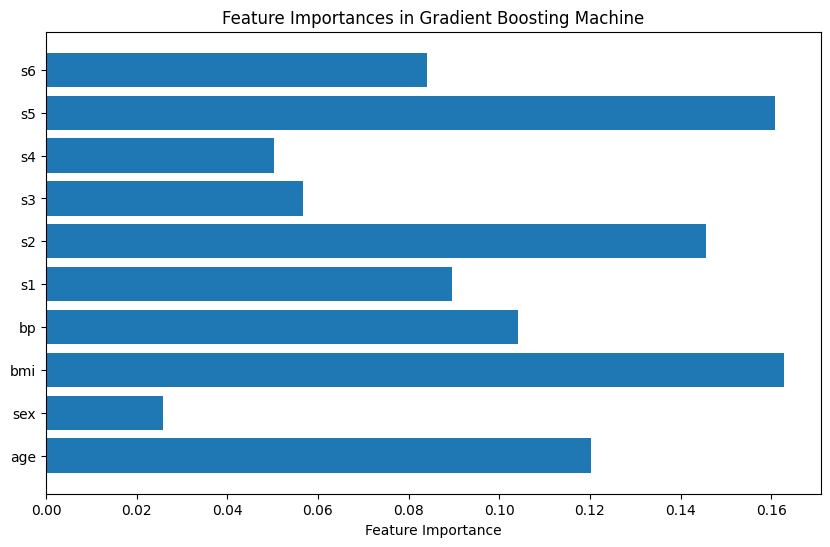

In [10]:
# Plot the feature importances for GBM
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, gbm_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Gradient Boosting Machine')
plt.show()